<a href="https://colab.research.google.com/github/DOMINION-JOHN1/loan-approval/blob/main/loan_eligibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA LOADING

In [25]:
from google.colab import drive

In [30]:
from google.colab import files

# Choose the file from your local computer to upload
uploaded = files.upload()

Saving Loan_Train.csv to Loan_Train.csv


## IMPORT

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib. pylab as plt
from sklearn. model_selection import train_test_split

MyDrive
.shortcut-targets-by-id
.file-revisions-by-id
.Trash-0


In [31]:
df = pd.read_csv('/content/Loan_Train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## DATA PREPROCESSING

In [37]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
df.dropna(inplace=True)

In [40]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [41]:
df["Dependents"] = np. where(df["Dependents"] == "3+", "3", df["Dependents"])

In [42]:
from sklearn. preprocessing import LabelEncoder
lb = LabelEncoder()

df["Gender"] = lb. fit_transform(df["Gender"])
df["Married"] = lb. fit_transform(df["Married"])
df["Dependents"] = lb. fit_transform(df["Dependents"])
df["Education"] = lb. fit_transform(df["Education"])
df["Self_Employed"] = lb. fit_transform(df["Self_Employed"])
df["Property_Area"] = lb. fit_transform(df["Property_Area"])

In [44]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,Y


In [54]:
df= df.drop(['Loan_ID'],axis=1)

## FEATURE ENGINEERING

In [55]:
df. Loan_Status. value_counts(normalize = True)
# so our data is Balanced data

Y    0.691667
N    0.308333
Name: Loan_Status, dtype: float64

Text(0, 0.5, 'Frequency')

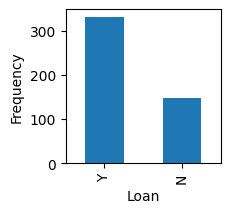

In [56]:
# Count of label
ax = df['Loan_Status'].value_counts().plot(kind='bar', figsize=(2,2))
ax.set_xlabel("Loan")
ax.set_ylabel("Frequency")

In [85]:
# Input and Output Split
predictors = df. loc[:, df.columns!="Loan_Status"]
type(predictors)

target = df["Loan_Status"]
type(target)


pandas.core.series.Series

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
predictors = scaler.fit_transform(predictors)


# **DECISION** **TREE**

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state=0)

In [89]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [91]:
dt_pred=DT.predict(x_test)

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           N       0.51      0.60      0.55        35
           Y       0.75      0.67      0.71        61

    accuracy                           0.65        96
   macro avg       0.63      0.64      0.63        96
weighted avg       0.66      0.65      0.65        96



# **RANDOM** **FOREST** **TREE**

In [93]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [94]:
RFC_pred=RFC.predict(x_test)

In [95]:
print(classification_report(y_test,RFC_pred))

              precision    recall  f1-score   support

           N       0.88      0.43      0.58        35
           Y       0.75      0.97      0.84        61

    accuracy                           0.77        96
   macro avg       0.81      0.70      0.71        96
weighted avg       0.80      0.77      0.75        96



## **SUPPORT** **VECTOR** **MACHINE**

In [96]:
from sklearn import svm
SM=svm.LinearSVC()
SM.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [97]:
SM_pred= SM.predict(x_test)

In [98]:
print(classification_report(y_test,SM_pred))

              precision    recall  f1-score   support

           N       1.00      0.37      0.54        35
           Y       0.73      1.00      0.85        61

    accuracy                           0.77        96
   macro avg       0.87      0.69      0.69        96
weighted avg       0.83      0.77      0.74        96



# **K** **Nearest** **Neighbour**

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [100]:
knn_pred=knn.predict(x_test)

In [101]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           N       0.92      0.31      0.47        35
           Y       0.71      0.98      0.83        61

    accuracy                           0.74        96
   macro avg       0.82      0.65      0.65        96
weighted avg       0.79      0.74      0.70        96



In [102]:
from sklearn.naive_bayes import BernoulliNB

In [103]:
NB=BernoulliNB()
NB.fit(x_train,y_train)

BernoulliNB()

In [104]:
NB_pred=NB.predict(x_test)

In [105]:
print(classification_report(y_test,NB_pred))

              precision    recall  f1-score   support

           N       0.93      0.37      0.53        35
           Y       0.73      0.98      0.84        61

    accuracy                           0.76        96
   macro avg       0.83      0.68      0.68        96
weighted avg       0.80      0.76      0.73        96

